In [43]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch import nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_parquet('../data/songs_optimized.parquet')

# Pre-procesado del dataframe

In [95]:
df.head()

,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,...,Genre_soul,Genre_soundtrack,Genre_swing,Genre_synthpop,Genre_techno,Genre_thrash metal,Genre_trance,Genre_trap,Genre_trip-hop,Genre_worship
0,105,-6.85,0,40,83,71,87,4,16,11,...,0,0,0,0,0,0,0,0,0,0
1,117,-5.75,0,42,85,70,87,4,32,0,...,0,0,0,0,0,0,0,0,0,0
2,121,-6.06,0,29,89,71,63,8,64,0,...,0,0,0,0,0,0,0,0,0,0
3,122,-5.42,0,24,84,78,97,4,12,12,...,0,0,0,0,0,0,0,0,0,0
4,123,-5.57,0,30,71,77,70,7,10,4,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df.dtypes

Tempo                   int64
Loudness (db)         float64
Explicit                int64
Popularity              uint8
Energy                  uint8
                       ...   
Genre_thrash metal      int64
Genre_trance            int64
Genre_trap              int64
Genre_trip-hop          int64
Genre_worship           int64
Length: 151, dtype: object

In [97]:
#guardar nombre de las canciones, para la validación?
nameSongs = df['song']

KeyError: 'song'

In [ ]:
#columnas a eliminar que no tienen relevancia para predecir la popularidad
columnas_innecesarias = ['Artist(s)', 'text', 'Similar Artist 1', 'Similar Song 1', 'Similar Artist 2', 'Similar Song 2',
                         'Similar Artist 3', 'Similar Song 3', 'Similarity Score 1', 'Similarity Score 2', 'Similarity Score 3',
                         'song', 'Album']

#eliminar release date??

In [ ]:
#eliminar columnas
df.drop(columns = columnas_innecesarias, inplace = True)

In [ ]:
df.dtypes

Length                              object
emotion                           category
Genre                             category
Release Date                        object
Key                               category
Tempo                                int64
Loudness (db)                       object
Time signature                    category
Explicit                              bool
Popularity                           uint8
Energy                               uint8
Danceability                         uint8
Positiveness                         uint8
Speechiness                          uint8
Liveness                             uint8
Acousticness                         uint8
Instrumentalness                     uint8
Good for Party                        bool
Good for Work/Study                   bool
Good for Relaxation/Meditation        bool
Good for Exercise                     bool
Good for Running                      bool
Good for Yoga/Stretching              bool
Good for Dr

In [ ]:
#ver si faltan datos
df.isnull().sum()

Length                            0
emotion                           0
Genre                             0
Release Date                      0
Key                               0
Tempo                             0
Loudness (db)                     0
Time signature                    8
Explicit                          0
Popularity                        0
Energy                            0
Danceability                      0
Positiveness                      0
Speechiness                       0
Liveness                          0
Acousticness                      0
Instrumentalness                  0
Good for Party                    0
Good for Work/Study               0
Good for Relaxation/Meditation    0
Good for Exercise                 0
Good for Running                  0
Good for Yoga/Stretching          0
Good for Driving                  0
Good for Social Gatherings        0
Good for Morning Routine          0
dtype: int64

In [ ]:
#en las siguientes líneas de código se van a formatear
#todas las columnas para que tengan entradas numéricas

In [ ]:
#convertir duración de la canción a segundos
df['Duration_sec'] = df['Length'].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1]))
df.drop(columns=['Length'], inplace=True)  # eliminar la columna original

In [ ]:
#convertir Loudness a valor numérico (quitar db y que no sea object)
df['Loudness (db)'] = df['Loudness (db)'].str.replace('db', '', regex=False).str.strip()
df['Loudness (db)'] = pd.to_numeric(df['Loudness (db)'], errors='coerce')

In [ ]:
#confirmar si se hizo bien la conversión
print(f"Valores NaN en Loudness (db): {df['Loudness (db)'].isna().sum()}")

Valores NaN en Loudness (db): 0


In [ ]:
print(df['Loudness (db)'].head())


0   -6.85
1   -5.75
2   -6.06
3   -5.42
4   -5.57
Name: Loudness (db), dtype: float64


In [ ]:
#convertir columnas booleanas a valor 0 y 1
#identificar las columnas
bool_cols = df.select_dtypes(include='bool').columns
#hacer conversión
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
#ver datos
print(df[bool_cols].head())

   Explicit  Good for Party  Good for Work/Study  \
0         0               0                    0   
1         0               0                    0   
2         0               0                    0   
3         0               0                    0   
4         0               0                    0   

   Good for Relaxation/Meditation  Good for Exercise  Good for Running  \
0                               0                  0                 0   
1                               0                  0                 0   
2                               0                  1                 0   
3                               0                  1                 0   
4                               0                  1                 0   

   Good for Yoga/Stretching  Good for Driving  Good for Social Gatherings  \
0                         0                 0                           0   
1                         0                 0                           0   
2          

In [ ]:
df.dtypes

emotion                           category
Genre                             category
Release Date                        object
Key                               category
Tempo                                int64
Loudness (db)                      float64
Time signature                    category
Explicit                             int64
Popularity                           uint8
Energy                               uint8
Danceability                         uint8
Positiveness                         uint8
Speechiness                          uint8
Liveness                             uint8
Acousticness                         uint8
Instrumentalness                     uint8
Good for Party                       int64
Good for Work/Study                  int64
Good for Relaxation/Meditation       int64
Good for Exercise                    int64
Good for Running                     int64
Good for Yoga/Stretching             int64
Good for Driving                     int64
Good for So

In [ ]:
#ver cantidad de valores distintos
df['emotion'].nunique()
df['Genre'].nunique()

3097

In [ ]:
#hacer one hot encodig para las columnas de tipo category
from sklearn.preprocessing import OneHotEncoder
colTypeCategory = ['emotion', 'Key', 'Time signature']
encoder = OneHotEncoder(sparse_output = False) #retorne un array denso
encoded = encoder.fit_transform(df[colTypeCategory]) #aplicar encoder a las columnas

#convertir el array a un dataframe
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(colTypeCategory))
#eliminar columnas de tipo category
df = df.drop(colTypeCategory, axis=1)
#añadir columnas de encoded_df al df original
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [ ]:
df.dtypes

Genre                 category
Release Date            object
Tempo                    int64
Loudness (db)          float64
Explicit                 int64
                        ...   
Time signature_1/4     float64
Time signature_3/4     float64
Time signature_4/4     float64
Time signature_5/4     float64
Time signature_nan     float64
Length: 65, dtype: object

In [ ]:
timeSignature_cols = [col for col in df.columns if col.startswith('Time signature')]
print(timeSignature_cols)

['Time signature_1/4', 'Time signature_3/4', 'Time signature_4/4', 'Time signature_5/4', 'Time signature_nan']


In [ ]:
key_cols = [col for col in df.columns if col.startswith('Key_')]
print("Categorías de key codificadas:", key_cols)

Categorías de key codificadas: ['Key_A Maj', 'Key_A min', 'Key_A# Maj', 'Key_A# min', 'Key_B Maj', 'Key_B min', 'Key_C Maj', 'Key_C min', 'Key_C# Maj', 'Key_C# min', 'Key_D Maj', 'Key_D min', 'Key_D# Maj', 'Key_D# min', 'Key_E Maj', 'Key_E min', 'Key_F Maj', 'Key_F min', 'Key_F# Maj', 'Key_F# min', 'Key_G Maj', 'Key_G min', 'Key_G# Maj', 'Key_G# min']


In [ ]:
emotion_cols = [col for col in df.columns if col.startswith('emotion_')]
print("Categorías de emotion codificadas:", emotion_cols)

Categorías de emotion codificadas: ['emotion_Love', 'emotion_True', 'emotion_anger', 'emotion_angry', 'emotion_confusion', 'emotion_fear', 'emotion_interest', 'emotion_joy', 'emotion_love', 'emotion_pink', 'emotion_sadness', 'emotion_surprise', 'emotion_thirst']


In [ ]:
#con genre no era conveniente hace One Hot coding, porque creaba una columna por cada
#combinación de géneros que tenía una canción, y se quiere una columna por cada género único
from sklearn.preprocessing import MultiLabelBinarizer #para hacer la conversión

#crear lista con los géneros presentes en el dataset
df['listaGeneros'] = df['Genre'].str.split(',')
#apra usar el codificador
mlb = MultiLabelBinarizer()
#asignación de 0 y 1 por cada lista de géneros en Genre por canción
listaGenreBinario = pd.DataFrame(mlb.fit_transform(df['listaGeneros']),
                             columns=[f'Genre_{g.strip()}' for g in mlb.classes_],
                             index=df.index)
#agregar las columnnas por cada género al df
df = pd.concat([df, listaGenreBinario], axis=1)

#sacar las columnas que no se necesitan
df.drop(columns=['Genre', 'listaGeneros'], inplace=True)

In [ ]:
df.dtypes

Release Date           object
Tempo                   int64
Loudness (db)         float64
Explicit                int64
Popularity              uint8
                       ...   
Genre_thrash metal      int64
Genre_trance            int64
Genre_trap              int64
Genre_trip-hop          int64
Genre_worship           int64
Length: 152, dtype: object

In [ ]:
genre_cols = [col for col in df.columns if col.startswith('Genre_')]
print(genre_cols)

['Genre_acoustic', 'Genre_alt-country', 'Genre_alternative', 'Genre_alternative rock', 'Genre_ambient', 'Genre_black metal', 'Genre_blues', 'Genre_britpop', 'Genre_chillout', 'Genre_chillwave', 'Genre_christian', 'Genre_classic rock', 'Genre_classical', 'Genre_cloud rap', 'Genre_comedy', 'Genre_country', 'Genre_dance', 'Genre_dancehall', 'Genre_death metal', 'Genre_deathcore', 'Genre_disco', 'Genre_doom metal', 'Genre_dream pop', 'Genre_drum and bass', 'Genre_dub', 'Genre_dubstep', 'Genre_electro', 'Genre_electronic', 'Genre_electropop', 'Genre_emo', 'Genre_emo rap', 'Genre_experimental', 'Genre_folk', 'Genre_funk', 'Genre_garage rock', 'Genre_gospel', 'Genre_grime', 'Genre_grunge', 'Genre_hard rock', 'Genre_hardcore', 'Genre_heavy metal', 'Genre_hip hop', 'Genre_hip-hop', 'Genre_house', 'Genre_indie', 'Genre_indie pop', 'Genre_indie rock', 'Genre_industrial', 'Genre_j-pop', 'Genre_jazz', 'Genre_k-pop', 'Genre_latin', 'Genre_lo-fi', 'Genre_math rock', 'Genre_melodic death metal', 'Genr

In [ ]:
print(df.columns.tolist())
print(df.info())

['Release Date', 'Tempo', 'Loudness (db)', 'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation', 'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine', 'Duration_sec', 'emotion_Love', 'emotion_True', 'emotion_anger', 'emotion_angry', 'emotion_confusion', 'emotion_fear', 'emotion_interest', 'emotion_joy', 'emotion_love', 'emotion_pink', 'emotion_sadness', 'emotion_surprise', 'emotion_thirst', 'Key_A Maj', 'Key_A min', 'Key_A# Maj', 'Key_A# min', 'Key_B Maj', 'Key_B min', 'Key_C Maj', 'Key_C min', 'Key_C# Maj', 'Key_C# min', 'Key_D Maj', 'Key_D min', 'Key_D# Maj', 'Key_D# min', 'Key_E Maj', 'Key_E min', 'Key_F Maj', 'Key_F min', 'Key_F# Maj', 'Key_F# min', 'Key_G Maj', 'Key_G min', 'Key_G# Maj', 'Key_G# min', 'Time signature_1/4', 'Time signature_3

In [ ]:
df.drop(columns=['Release Date'], inplace=True)


In [ ]:
df

,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,...,Genre_soul,Genre_soundtrack,Genre_swing,Genre_synthpop,Genre_techno,Genre_thrash metal,Genre_trance,Genre_trap,Genre_trip-hop,Genre_worship
0,105,-6.85,0,40,83,71,87,4,16,11,...,0,0,0,0,0,0,0,0,0,0
1,117,-5.75,0,42,85,70,87,4,32,0,...,0,0,0,0,0,0,0,0,0,0
2,121,-6.06,0,29,89,71,63,8,64,0,...,0,0,0,0,0,0,0,0,0,0
3,122,-5.42,0,24,84,78,97,4,12,12,...,0,0,0,0,0,0,0,0,0,0
4,123,-5.57,0,30,71,77,70,7,10,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551438,140,-10.00,1,31,82,83,19,16,9,39,...,0,0,0,0,0,0,0,0,0,0
551439,128,-9.68,0,29,43,39,26,3,10,54,...,0,0,0,0,0,0,0,0,0,0
551440,75,-4.67,0,21,79,56,41,5,19,0,...,0,0,0,0,0,0,0,0,0,0
551441,126,-3.93,0,5,90,59,69,4,7,27,...,0,0,0,0,0,0,0,0,0,0


# Modelo de Red Neuronal MLP

## Modelo

In [174]:
#Modelo de red neuronal
class MLP(nn.Module):
    def __init__(self, hidden_size=10, input_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.h1 = nn.Linear(in_features=input_size,out_features=self.hidden_size)
        self.h2 = nn.Linear(in_features=self.hidden_size,out_features=self.hidden_size)
        self.out = nn.Linear(in_features=self.hidden_size,out_features=1)

        self.act = nn.Sigmoid()
    def forward(self, x):
        l1 = self.h1(x)  #de entrada a capa oculta
        l2 = self.h2(l1)  #de capa oculta a capa oculta
        l2 = self.act(l2)     #activación
        output = self.out(l2)   #salida
        return output

## División del dataset

In [175]:
train_df, val_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=False)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42, shuffle=False)


In [176]:
val_df.shape, test_df.shape, train_df.shape

((82716, 151), (82717, 151), (386010, 151))

## Modelo popularidad general

### Pre-procesado de datos

In [ ]:
# Normalizar la columna 'Popularity' entre 0 y 1
scaler = MinMaxScaler()
train_df['Popularity'] = scaler.fit_transform(train_df[['Popularity']])
val_df['Popularity'] = scaler.transform(val_df[['Popularity']])
test_df['Popularity'] = scaler.transform(test_df[['Popularity']])

# Convertir el DataFrame a tensores de PyTorch
X_train = torch.tensor(train_df.drop(columns=['Popularity']).values, dtype=torch.float32)  
X_train = DataLoader(X_train, batch_size=8578, shuffle=False)  # Crear DataLoader para el conjunto de entrenamiento
y_train = torch.tensor(train_df['Popularity'].values, dtype=torch.float32).view(-1, 1)  # Asegurarse de que y tenga la forma correcta
y_train = DataLoader(y_train, batch_size=8578, shuffle=False)  # Crear DataLoader para las etiquetas de entrenamiento

X_val = torch.tensor(val_df.drop(columns=['Popularity']).values, dtype=torch.float32)
X_val = DataLoader(X_val, batch_size=3938, shuffle=False)  # Crear DataLoader para el conjunto de validación
y_val = torch.tensor(val_df['Popularity'].values, dtype=torch.float32).view(-1, 1)
y_val = DataLoader(y_val, batch_size=3938, shuffle=False)  # Crear DataLoader para las etiquetas de validación


X_test = torch.tensor(test_df.drop(columns=['Popularity']).values, dtype=torch.float32)
X_test = DataLoader(X_test, batch_size=3939, shuffle=False)  # Crear DataLoader para el conjunto de prueba
y_test = torch.tensor(test_df['Popularity'].values, dtype=torch.float32).view(-1, 1)
y_test = DataLoader(y_test, batch_size=3939, shuffle=False)  # Crear DataLoader para las etiquetas de prueba


In [178]:
len(X_train), len(X_val), len(X_test)

(45, 22, 21)

### Inicialización del modelo

In [179]:
#Instanciar el modelo
model = MLP(hidden_size=10, input_size=len(df.columns)-1)  # -1 porque la última columna es la de popularidad

# Usar GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()  # Mean Squared Error para regresión 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)  # Adam optimizer

print(model.h1.weight)
print(model.h2.weight)
print(model.out.weight)

Parameter containing:
tensor([[-0.0573,  0.0364, -0.0734,  ..., -0.0514, -0.0367,  0.0218],
        [ 0.0598,  0.0137,  0.0504,  ..., -0.0758, -0.0407,  0.0307],
        [-0.0512,  0.0680, -0.0696,  ...,  0.0245,  0.0136, -0.0678],
        ...,
        [ 0.0055,  0.0153,  0.0408,  ...,  0.0193,  0.0489,  0.0746],
        [-0.0377,  0.0431, -0.0252,  ...,  0.0011, -0.0073, -0.0485],
        [ 0.0048, -0.0373,  0.0561,  ...,  0.0407,  0.0316,  0.0040]],
       requires_grad=True)
Parameter containing:
tensor([[-2.3539e-01,  8.8217e-02, -1.7676e-01,  4.1319e-02, -3.0148e-01,
         -1.6081e-01,  2.5772e-01, -3.9557e-02,  1.7191e-01,  2.5120e-01],
        [-1.9684e-01, -4.6663e-02,  2.8974e-01,  2.2644e-01,  2.6875e-01,
         -2.7029e-01,  2.4928e-01,  7.4092e-02, -2.2171e-01,  5.7106e-02],
        [ 7.2832e-02,  8.7518e-02, -2.9661e-01,  6.6686e-02, -2.3905e-01,
          2.7696e-01,  1.9391e-01, -2.0155e-04,  2.0323e-01,  1.6927e-01],
        [ 1.4030e-01,  1.2649e-01, -2.7459e-01, 

### Entrenamiento del modelo

In [172]:
#Loop de entrenamiento
epochs = 300  # Número de épocas para el entrenamiento
epoch = 0
patience=10

batch_size = 8578
batchs_per_epoch = 45

train_losses = []
val_losses = []
best_val_loss = float('inf')

while epoch < epochs:    
    model.train()
    running_loss = 0.0
    for _ in tqdm(range(batchs_per_epoch), desc=f"Epoch {epoch+1}"):
        input, labels = next(iter(X_train)), next(iter(y_train))  # Obtener un batch de datos
        input, labels = input.to(device), labels.to(device)

        optimizer.zero_grad()

        # Salidas 
        output = model(input)

        # Pérdida combinada
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(X_train))

    # Validación
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for _ in range(len(X_val)):
            input, labels = next(iter(X_val)), next(iter(y_val))
            input, labels = input.to(device), labels.to(device)

            # Solo predicción principal en validación
            outputs = model(input)  
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy()

    val_losses.append(val_loss / len(X_val))
    print(f"Época {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")
    # Early stopping
    if best_val_loss > (val_loss / len(X_val)):
        patience = 10
        best_val_loss = val_loss / len(X_val)
        print(f"Nuevo mínimo en loss de validación")   
    else:
        patience -= 1
        if patience <= 0:
            print("Early stopping triggered")
            break
    epoch += 1

Epoch 1: 100%|██████████| 45/45 [00:02<00:00, 18.87it/s]


Época 1 | Train Loss: 0.0443 | Val Loss: 0.0338
Nuevo mínimo en loss de validación


Epoch 2: 100%|██████████| 45/45 [00:02<00:00, 20.19it/s]


Época 2 | Train Loss: 0.0410 | Val Loss: 0.0327
Nuevo mínimo en loss de validación


Epoch 3: 100%|██████████| 45/45 [00:02<00:00, 21.51it/s]


Época 3 | Train Loss: 0.0393 | Val Loss: 0.0322
Nuevo mínimo en loss de validación


Epoch 4: 100%|██████████| 45/45 [00:02<00:00, 22.07it/s]


Época 4 | Train Loss: 0.0374 | Val Loss: 0.0316
Nuevo mínimo en loss de validación


Epoch 5: 100%|██████████| 45/45 [00:02<00:00, 19.76it/s]


Época 5 | Train Loss: 0.0360 | Val Loss: 0.0307
Nuevo mínimo en loss de validación


Epoch 6: 100%|██████████| 45/45 [00:02<00:00, 18.46it/s]


Época 6 | Train Loss: 0.0347 | Val Loss: 0.0304
Nuevo mínimo en loss de validación


Epoch 7: 100%|██████████| 45/45 [00:02<00:00, 19.07it/s]


Época 7 | Train Loss: 0.0335 | Val Loss: 0.0302
Nuevo mínimo en loss de validación


Epoch 8: 100%|██████████| 45/45 [00:02<00:00, 22.01it/s]


Época 8 | Train Loss: 0.0324 | Val Loss: 0.0299
Nuevo mínimo en loss de validación


Epoch 9: 100%|██████████| 45/45 [00:02<00:00, 21.31it/s]


Época 9 | Train Loss: 0.0312 | Val Loss: 0.0297
Nuevo mínimo en loss de validación


Epoch 10: 100%|██████████| 45/45 [00:02<00:00, 20.58it/s]


Época 10 | Train Loss: 0.0300 | Val Loss: 0.0296
Nuevo mínimo en loss de validación


Epoch 11: 100%|██████████| 45/45 [00:02<00:00, 18.62it/s]


Época 11 | Train Loss: 0.0289 | Val Loss: 0.0294
Nuevo mínimo en loss de validación


Epoch 12: 100%|██████████| 45/45 [00:02<00:00, 20.58it/s]


Época 12 | Train Loss: 0.0280 | Val Loss: 0.0294
Nuevo mínimo en loss de validación


Epoch 13: 100%|██████████| 45/45 [00:01<00:00, 22.65it/s]


Época 13 | Train Loss: 0.0272 | Val Loss: 0.0293
Nuevo mínimo en loss de validación


Epoch 14: 100%|██████████| 45/45 [00:02<00:00, 20.64it/s]


Época 14 | Train Loss: 0.0265 | Val Loss: 0.0293


Epoch 15: 100%|██████████| 45/45 [00:02<00:00, 20.58it/s]


Época 15 | Train Loss: 0.0260 | Val Loss: 0.0292
Nuevo mínimo en loss de validación


Epoch 16: 100%|██████████| 45/45 [00:02<00:00, 20.64it/s]


Época 16 | Train Loss: 0.0255 | Val Loss: 0.0293


Epoch 17: 100%|██████████| 45/45 [00:02<00:00, 20.82it/s]


Época 17 | Train Loss: 0.0251 | Val Loss: 0.0292


Epoch 18: 100%|██████████| 45/45 [00:01<00:00, 22.53it/s]


Época 18 | Train Loss: 0.0247 | Val Loss: 0.0296


Epoch 19: 100%|██████████| 45/45 [00:02<00:00, 20.83it/s]


Época 19 | Train Loss: 0.0244 | Val Loss: 0.0297


Epoch 20: 100%|██████████| 45/45 [00:02<00:00, 19.34it/s]


Época 20 | Train Loss: 0.0241 | Val Loss: 0.0299


Epoch 21: 100%|██████████| 45/45 [00:02<00:00, 21.00it/s]


Época 21 | Train Loss: 0.0238 | Val Loss: 0.0300


Epoch 22: 100%|██████████| 45/45 [00:02<00:00, 22.47it/s]


Época 22 | Train Loss: 0.0235 | Val Loss: 0.0303


Epoch 23: 100%|██████████| 45/45 [00:02<00:00, 20.55it/s]


Época 23 | Train Loss: 0.0233 | Val Loss: 0.0307


Epoch 24: 100%|██████████| 45/45 [00:02<00:00, 21.16it/s]


Época 24 | Train Loss: 0.0230 | Val Loss: 0.0310


Epoch 25: 100%|██████████| 45/45 [00:02<00:00, 20.62it/s]


Época 25 | Train Loss: 0.0228 | Val Loss: 0.0315
Early stopping triggered


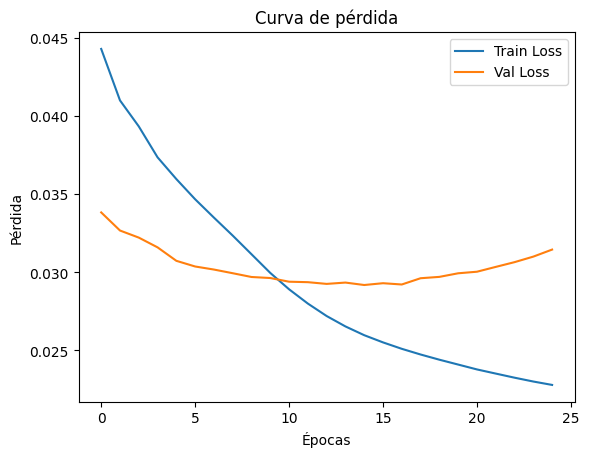

In [173]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de pérdida')
plt.show()

In [ ]:
print(model.h1.weight)
print(model.h2.weight)
print(model.out.weight)

## Modelo popularidad segmentada

### Pre-procesado de datos

In [ ]:
# Normalizar la columna 'Popularity' entre 0 y 1
scaler = MinMaxScaler()
train_df['Popularity'] = scaler.fit_transform(train_df[['Popularity']])
val_df['Popularity'] = scaler.transform(val_df[['Popularity']])
test_df['Popularity'] = scaler.transform(test_df[['Popularity']])

# Convertir el DataFrame a tensores de PyTorch
X_train = torch.tensor(train_df.drop(columns=['Popularity']).values, dtype=torch.float32)  
X_train = DataLoader(X_train, batch_size=8578, shuffle=False)  # Crear DataLoader para el conjunto de entrenamiento
y_train = torch.tensor(train_df['Popularity'].values, dtype=torch.float32).view(-1, 1)  # Asegurarse de que y tenga la forma correcta
y_train = DataLoader(y_train, batch_size=8578, shuffle=False)  # Crear DataLoader para las etiquetas de entrenamiento

X_val = torch.tensor(val_df.drop(columns=['Popularity']).values, dtype=torch.float32)
X_val = DataLoader(X_val, batch_size=3938, shuffle=False)  # Crear DataLoader para el conjunto de validación
y_val = torch.tensor(val_df['Popularity'].values, dtype=torch.float32).view(-1, 1)
y_val = DataLoader(y_val, batch_size=3938, shuffle=False)  # Crear DataLoader para las etiquetas de validación


X_test = torch.tensor(test_df.drop(columns=['Popularity']).values, dtype=torch.float32)
X_test = DataLoader(X_test, batch_size=3939, shuffle=False)  # Crear DataLoader para el conjunto de prueba
y_test = torch.tensor(test_df['Popularity'].values, dtype=torch.float32).view(-1, 1)
y_test = DataLoader(y_test, batch_size=3939, shuffle=False)  # Crear DataLoader para las etiquetas de prueba


In [ ]:
len(X_train), len(X_val), len(X_test)

### Inicialización del modelo

In [ ]:
# Instanciar el modelo
model2 = MLP(hidden_size=10, input_size=len(df.columns)-1)  # -1 porque la última columna es la de popularidad

# Usar GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = model2.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()  # Mean Squared Error para regresión 
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)  # Adam optimizer

print(model.h1.weight)
print(model.h2.weight)
print(model.out.weight)

### Entrenamiento del modelo

In [ ]:
#Loop de entrenamiento
epochs = 300  # Número de épocas para el entrenamiento
epoch = 0
patience=10

batch_size = 8578
batchs_per_epoch = 45

train_losses = []
val_losses = []
best_val_loss = float('inf')

while epoch < epochs:    
    model.train()
    running_loss = 0.0
    for _ in tqdm(range(batchs_per_epoch), desc=f"Epoch {epoch+1}"):
        input, labels = next(iter(X_train)), next(iter(y_train))  # Obtener un batch de datos
        input, labels = input.to(device), labels.to(device)

        optimizer.zero_grad()

        # Salidas 
        output = model(input)

        # Pérdida combinada
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(X_train))

    # Validación
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for _ in range(len(X_val)):
            input, labels = next(iter(X_val)), next(iter(y_val))
            input, labels = input.to(device), labels.to(device)

            # Solo predicción principal en validación
            outputs = model(input)  
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy()

    val_losses.append(val_loss / len(X_val))
    print(f"Época {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")
    # Early stopping
    if best_val_loss > (val_loss / len(X_val)):
        patience = 10
        best_val_loss = val_loss / len(X_val)
        print(f"Nuevo mínimo en loss de validación")   
    else:
        patience -= 1
        if patience <= 0:
            print("Early stopping triggered")
            break
    epoch += 1

Época 1 | Train Loss: 1388.8176 | Val Loss: 1386.5251
Época 2 | Train Loss: 1386.5251 | Val Loss: 1383.2905
Época 3 | Train Loss: 1383.2905 | Val Loss: 1379.0564
Época 4 | Train Loss: 1379.0564 | Val Loss: 1374.4260
Época 5 | Train Loss: 1374.4260 | Val Loss: 1370.4170


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

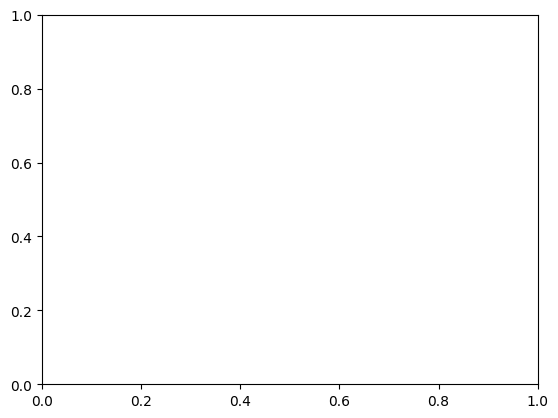

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de pérdida')
plt.show()

print(model.h1.weight)
print(model.h2.weight)
print(model.out.weight)